In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing csv file into Juypter and reading top 5 rows of dataset to understand the data
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# reading the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Checking dataframe dimension
df.ndim

2

In [5]:
# Starting with data clean-up activity to make it ready for analysis
# Checking for columns with null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Since there are columns with all 39717 rows as null, dropping those columns
df = df.dropna(axis = 1, how = 'all')

In [7]:
#Checking for updated dataframe for number of rows and columns
df.shape

(39717, 57)

In [8]:
# Removing columns with only one value in all rows for that column or just two values (zero & NA)
df = df.drop(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis = 1)

In [9]:
#Checking for updated dataframe for number of rows and columns
df.shape

(39717, 48)

In [10]:
# Removing rows which does not contribute in the analysis of problem statement or the values are too distinct in each cell which cannot be analyzed like url, Desc
df = df.drop(['id','member_id','url','desc'], axis = 1)

In [11]:
#Checking for updated dataframe for number of rows and columns
df.shape

(39717, 44)

In [12]:
# Creating function to remove percentage sign and changing the data into numeric form
def remove_perc(x):
    if isinstance(x,str):
        return float(x.replace('%',''))
    return x

In [13]:
# Removing percentage and converting columns into float / numeric value for data analysis
df.int_rate = df.int_rate.apply(remove_perc)
df.revol_util = df.revol_util.apply(remove_perc)

In [14]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [15]:
# Creating two new columns for month and year from issue_d
month_year = df['issue_d'].str.partition('-', True)
df['month'] = month_year[0]
df['year'] = month_year[2]

In [16]:
# 'loan status' as 'current' wil not provide much insight. Analysis can be drawn based either on 'Fully Paid' or 'Defaulted' loan status.
# Thus, removing rows with loan status as "Current"
df = df[df['loan_status'] != 'Current']

# Performing Univariate Analysis

In [17]:
# Performng univariate analysis on loan status as "Charged off"
df1 = df[df['loan_status'] == 'Charged Off']

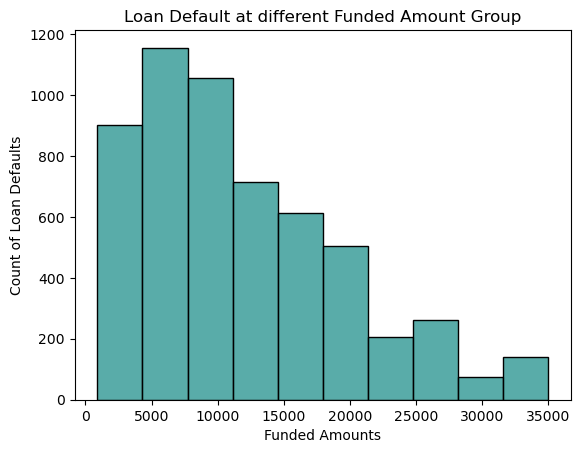

In [18]:
# Creating histogram to check on loan defaults at different loan amount
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['funded_amnt'], color = palette(0.5), bins = 10)
plt.xlabel('Funded Amounts')
plt.ylabel('Count of Loan Defaults')
plt.title('Loan Default at different Funded Amount Group')
plt.show()

### Outcome - Higher volume of loan deault/count is at lower loan amount (especialy upto 10K loan amount).

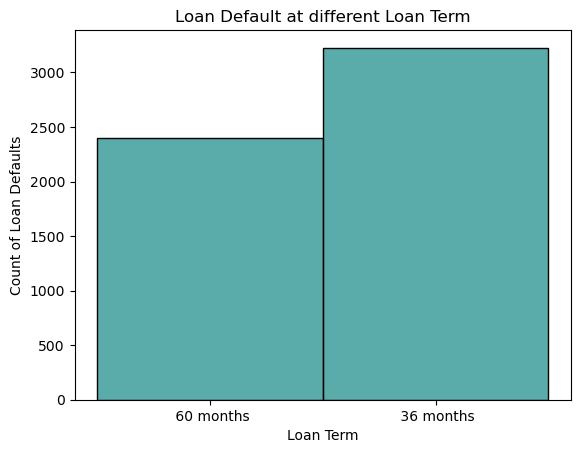

In [19]:
# Creating histogram to check on default at different terms
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['term'],color = palette(0.5))
plt.xlabel('Loan Term')
plt.ylabel('Count of Loan Defaults')
plt.title('Loan Default at different Loan Term')
plt.show()

### Outcome - Higher volume of loan deault is at lower loan tenure.

In [20]:
# Computing loam amount disbursed at different loan term and loan status levels
loan_amnt_disb = df.groupby(['term','loan_status'])['funded_amnt'].sum().reset_index(name = 'Funded Amount')
total_la = df.groupby(['term'])['funded_amnt'].sum().reset_index(name = 'Total Funded Amount')
loan_amnt_disb = loan_amnt_disb.merge(total_la, on = 'term')
loan_amnt_disb

,term,loan_status,Funded Amount,Total Funded Amount
0,36 months,Charged Off,29875775,275513125
1,36 months,Fully Paid,245637350,275513125
2,60 months,Charged Off,36260600,140503500
3,60 months,Fully Paid,104242900,140503500


### Outcome - Total loan funded amount is higher for 36 months term but default value is higher at 60 months term

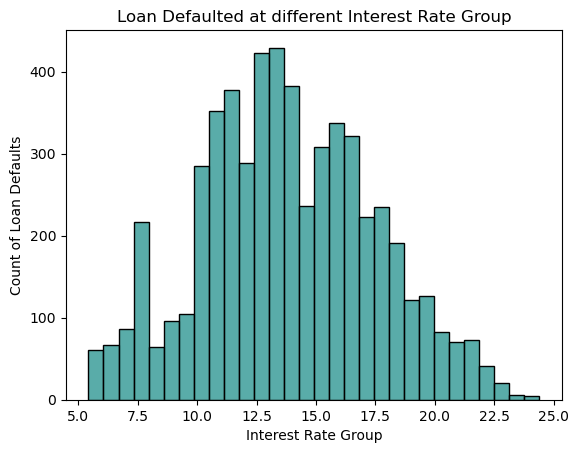

In [21]:
# Creating histogram to check on default at different interest rate
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['int_rate'],color = palette(0.5),bins = 30)
plt.xlabel('Interest Rate Group')
plt.ylabel('Count of Loan Defaults')
plt.title('Loan Defaulted at different Interest Rate Group')
plt.show()

### Outcome - Higher volume of loan deault/count is between 12% to 14% interest rate .

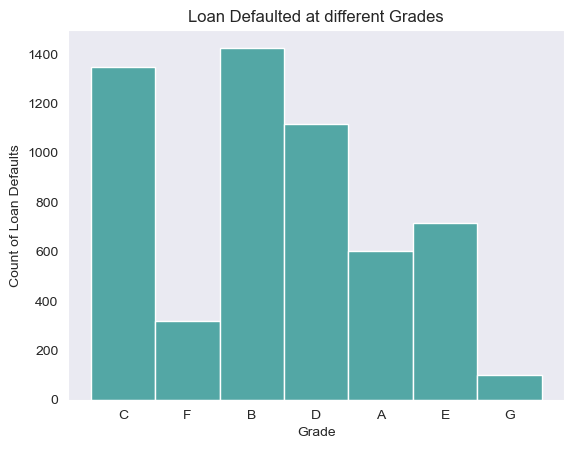

In [22]:
# Creating histogram to check on default at different grade
sns.set_style('dark')
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['grade'],color = palette(0.5))
plt.xlabel('Grade')
plt.ylabel('Count of Loan Defaults')
plt.title('Loan Defaulted at different Grades')
plt.show()

### Outcome - Grade B, C & D contributes higher volume of loan default/count.

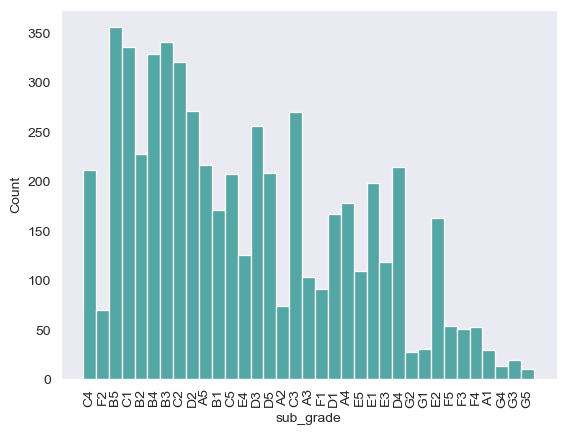

In [74]:
# Creating histogram to check on default at different Sub grade
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['sub_grade'],color = palette(0.5))
plt.xticks(rotation = 90)
plt.show()

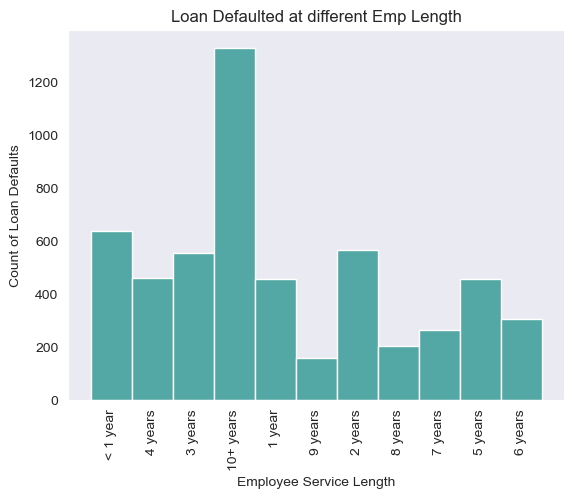

In [24]:
# Creating histogram to check on loan default at different employee service length
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['emp_length'],color = palette(0.5))
plt.xlabel('Employee Service Length')
plt.ylabel('Count of Loan Defaults')
plt.title('Loan Defaulted at different Emp Length')
plt.xticks(rotation = 90)
plt.show()

### Outcome - Maximum volume of loan default/count is with employee experience level of 10+ years.

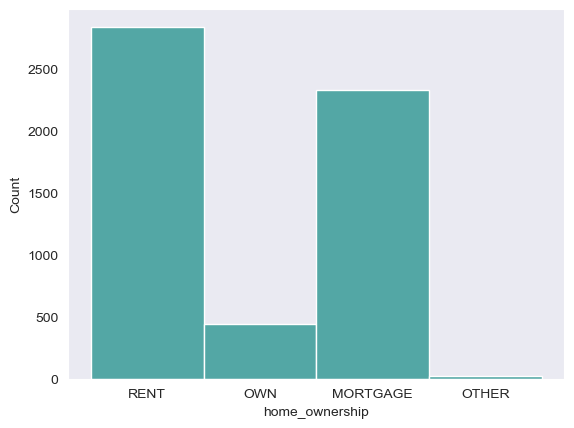

In [25]:
# Creating histogram to check on default at different home ownership
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['home_ownership'],color = palette(0.5))
plt.show()

### Outcome - Maximum volume of loan default/count is where defaulter lives in rented or morgaged accommodation.

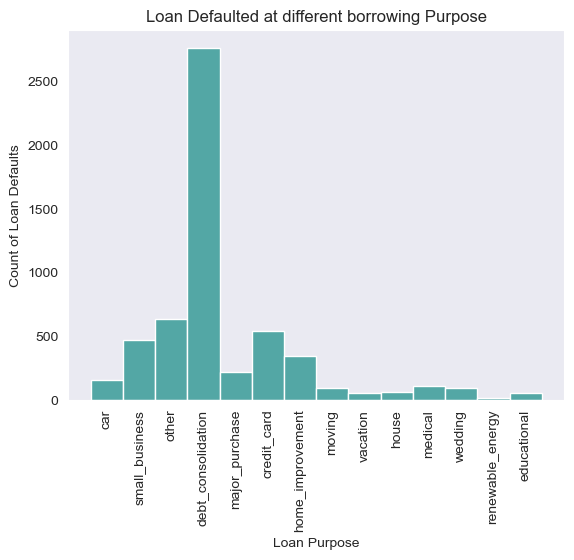

In [26]:
# Creating histogram to check on default at different loan purpose
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df1['purpose'],color = palette(0.5))
plt.xticks(rotation = 90)
plt.xlabel('Loan Purpose')
plt.ylabel('Count of Loan Defaults')
plt.title('Loan Defaulted at different borrowing Purpose')
plt.show()

### Outcome - Highest loan default/count volumne relates to borrowers with purpose of "debt_consolidation".

In [27]:
# Computing loam amount disbursed for different purpose to check the volume at each level
loan_purpose = df.groupby(['purpose','loan_status'])['funded_amnt'].sum().reset_index(name = 'Funded Amount')
total_pur = df.groupby(['purpose'])['funded_amnt'].sum().reset_index(name = 'Total Funded Amount')
loan_purpose = loan_purpose.merge(total_pur, on = 'purpose')
loan_purpose

,purpose,loan_status,Funded Amount,Total Funded Amount
0,car,Charged Off,1152425,10015425
1,car,Fully Paid,8863000,10015425
2,credit_card,Charged Off,6800000,56830200
3,credit_card,Fully Paid,50030200,56830200
4,debt_consolidation,Charged Off,36331750,220422775
5,debt_consolidation,Fully Paid,184091025,220422775
6,educational,Charged Off,420475,2174925
7,educational,Fully Paid,1754450,2174925
8,home_improvement,Charged Off,4039425,31615400
9,home_improvement,Fully Paid,27575975,31615400


### Outcome - Maximum loan disbursement and loan default volume sits with loan purpose 'debt-consolidation'

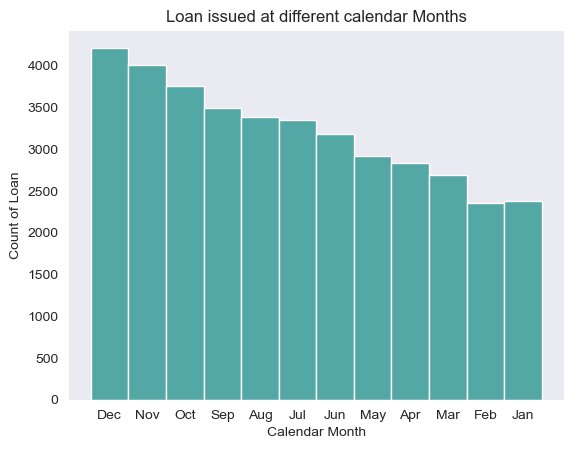

In [68]:
# Creating histogram to check number of applications (loan_status - Fully paid and charged off)
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(df['month'], color = palette(0.5))
plt.xlabel('Calendar Month')
plt.ylabel('Count of Loan')
plt.title('Loan issued at different calendar Months')
plt.show()

### Outcome - Maximum loan default happens in the quarter-end months (month 3) and year end (i.e. Dec). This could be because sales team becomes liberal on granting loans to applicants to achieve their sales targets.

# Performing Bivariate Analysis

In [29]:
# Defining a function which calculates the percentage of loan default(charged-off) at each category level. 
# For example: default as percentage of total applications (Fully paid and charged off) for term 36 months. 
def perc_cal(df, x,y):
# Grouping categories of field/column x and Making count of different loan staus (Fully Paid, Charged off)
    new_df = df.groupby([x,y])[y].count().reset_index(name='count')
# Getting sub-total of loan status (Fully paid + charged off) at for each category level of field/column x
    totals = df.groupby(x)[y].count().reset_index(name='total')
    new_df = new_df.merge(totals, on = x)
# Calculating percentage of loan default for each category based on total application (Fully Paid + Charged off) at that category
    new_df['Loan_Default_Percentage'] = round((new_df['count'] / new_df['total']) * 100,2)
# For data representation purpose, keeping percentages related to loan default.
    new_df = new_df[new_df[y] != 'Fully Paid']
    return new_df

In [30]:
# Computing percentage of loan default at each Term level
result_term = perc_cal(df,'term','loan_status')
result_term

,term,loan_status,count,total,Loan_Default_Percentage
0,36 months,Charged Off,3227,29096,11.09
2,60 months,Charged Off,2400,9481,25.31


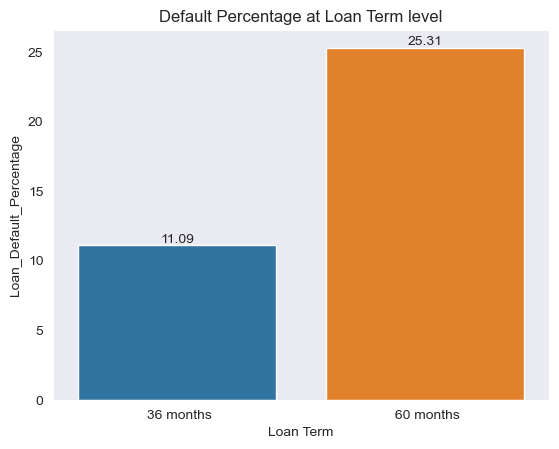

In [31]:
plots1 = sns.barplot(x = 'term', y = 'Loan_Default_Percentage', data = result_term)
plots1.bar_label(plots1.containers[0])
plt.xlabel('Loan Term')
plt.title('Default Percentage at Loan Term level')
plt.show()

### Outcome - +25% of total loan applcation approved for 60 months term gets defaulted

In [32]:
# Computing percentage of loan default at each grade level
result_grade = perc_cal(df,'grade','loan_status')
result_grade

,grade,loan_status,count,total,Loan_Default_Percentage
0,A,Charged Off,602,10045,5.99
2,B,Charged Off,1425,11675,12.21
4,C,Charged Off,1347,7834,17.19
6,D,Charged Off,1118,5085,21.99
8,E,Charged Off,715,2663,26.85
10,F,Charged Off,319,976,32.68
12,G,Charged Off,101,299,33.78


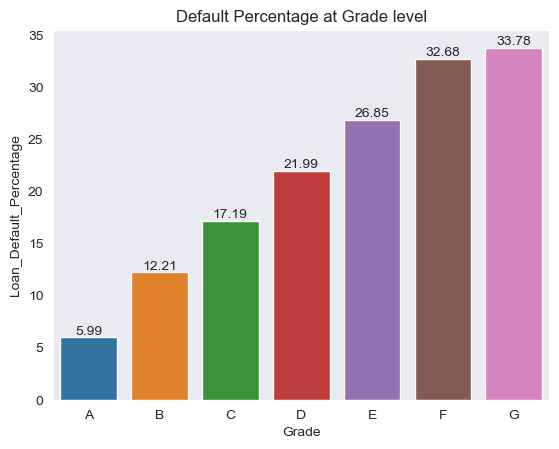

In [33]:
plots2 = sns.barplot(x = 'grade', y = 'Loan_Default_Percentage', data = result_grade)
plots2.bar_label(plots2.containers[0])
plt.xlabel('Grade')
plt.title('Default Percentage at Grade level')
plt.show()

### Outcome - LC grading seems to be working as percentage loan default goes up with lower grades (especially grade E, F & G)

In [34]:
result_sub_grade = perc_cal(df,'sub_grade','loan_status')
result_sub_grade.head()

,sub_grade,loan_status,count,total,Loan_Default_Percentage
0,A1,Charged Off,30,1139,2.63
2,A2,Charged Off,74,1508,4.91
4,A3,Charged Off,103,1810,5.69
6,A4,Charged Off,178,2873,6.20
8,A5,Charged Off,217,2715,7.99


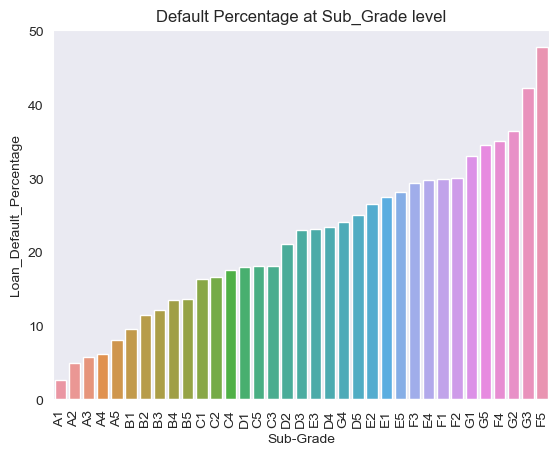

In [35]:
sns.barplot(x = 'sub_grade', y = 'Loan_Default_Percentage', data = result_sub_grade,order = result_sub_grade.sort_values('Loan_Default_Percentage').sub_grade)
plt.xticks(rotation = 90)
plt.xlabel('Sub-Grade')
plt.title('Default Percentage at Sub_Grade level')
plt.show()

### Outcome - Sub-Grade F4, F5, G1, G2, G3 & G5 hav higher loan default percentage.

In [36]:
# Computing percentage of loan default at each emp Length level
result_emp_length = perc_cal(df,'emp_length','loan_status')
result_emp_length

,emp_length,loan_status,count,total,Loan_Default_Percentage
0,1 year,Charged Off,456,3169,14.39
2,10+ years,Charged Off,1331,8488,15.68
4,2 years,Charged Off,567,4291,13.21
6,3 years,Charged Off,555,4012,13.83
8,4 years,Charged Off,462,3342,13.82
10,5 years,Charged Off,458,3194,14.34
12,6 years,Charged Off,307,2168,14.16
14,7 years,Charged Off,263,1711,15.37
16,8 years,Charged Off,203,1435,14.15
18,9 years,Charged Off,158,1226,12.89


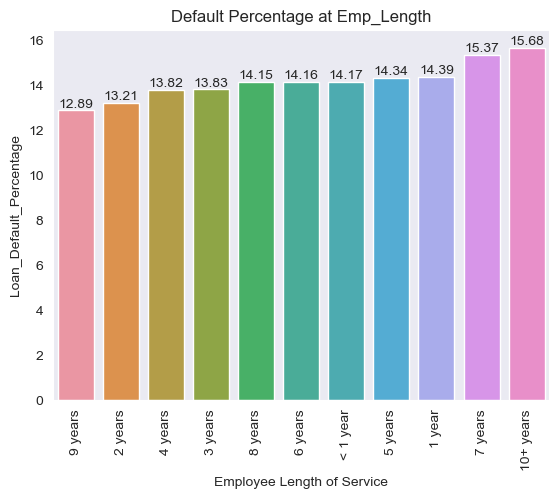

In [37]:
plots3 = sns.barplot(x = 'emp_length', y = 'Loan_Default_Percentage', data = result_emp_length, order = result_emp_length.sort_values('Loan_Default_Percentage').emp_length)
plots3.bar_label(plots3.containers[0])
plt.xticks(rotation = 90)
plt.xlabel('Employee Length of Service')
plt.title('Default Percentage at Emp_Length')
plt.show()

### Outcome - Though there is not much significant relation of loan default vs. employee legth of service but loan default of +15% with employee service length of 7 and 10+ years is noticeable 

In [38]:
# Computing percentage of loan default at each home ownership level
result_home_ownership = perc_cal(df,'home_ownership','loan_status')
# removing category 'Other' for analysis purposes
result_home_ownership = result_home_ownership[result_home_ownership['home_ownership'] != 'OTHER']
result_home_ownership

,home_ownership,loan_status,count,total,Loan_Default_Percentage
0,MORTGAGE,Charged Off,2327,17021,13.67
5,OWN,Charged Off,443,2975,14.89
7,RENT,Charged Off,2839,18480,15.36


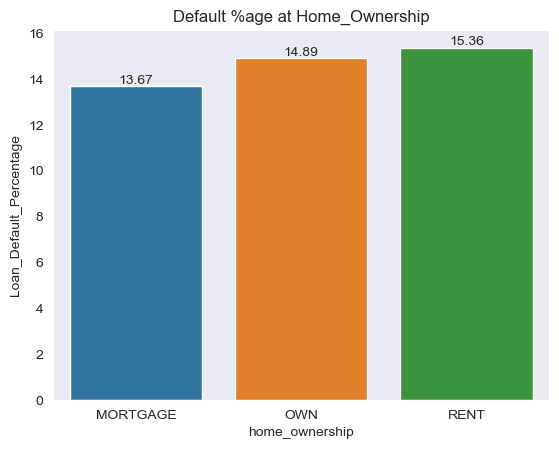

In [39]:
plots4 = sns.barplot(x = 'home_ownership', y = 'Loan_Default_Percentage', data = result_home_ownership, order = result_home_ownership.sort_values('Loan_Default_Percentage').home_ownership)
plots4.bar_label(plots4.containers[0])
plt.title('Default %age at Home_Ownership')
plt.show()

### Outcome - Not very significant relation between loan default and home ownership of the borrower.

In [40]:
# Computing percentage of loan default at each purpose level
result_purpose = perc_cal(df,'purpose','loan_status')
result_purpose

,purpose,loan_status,count,total,Loan_Default_Percentage
0,car,Charged Off,160,1499,10.67
2,credit_card,Charged Off,542,5027,10.78
4,debt_consolidation,Charged Off,2767,18055,15.33
6,educational,Charged Off,56,325,17.23
8,home_improvement,Charged Off,347,2875,12.07
10,house,Charged Off,59,367,16.08
12,major_purchase,Charged Off,222,2150,10.33
14,medical,Charged Off,106,681,15.57
16,moving,Charged Off,92,576,15.97
18,other,Charged Off,633,3865,16.38


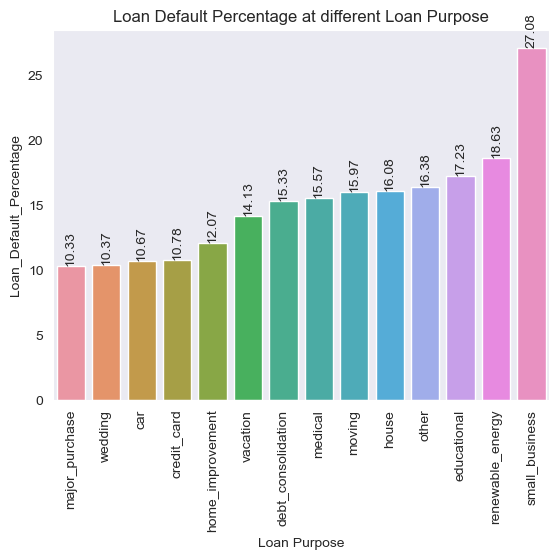

In [41]:
plots11 = sns.barplot(x = 'purpose', y = 'Loan_Default_Percentage', data = result_purpose, order = result_purpose.sort_values('Loan_Default_Percentage').purpose)
plots11.bar_label(plots11.containers[0],rotation = 90)
plt.xticks(rotation = 90)
plt.xlabel('Loan Purpose')
plt.title('Loan Default Percentage at different Loan Purpose')
plt.show()

### Outcome - Highest loan default relates to loan taken for the purpose of small business.

In [42]:
# Computing percentage of loan default at each verification level
result_verification_status = perc_cal(df,'verification_status','loan_status')
result_verification_status

,verification_status,loan_status,count,total,Loan_Default_Percentage
0,Not Verified,Charged Off,2142,16694,12.83
2,Source Verified,Charged Off,1434,9677,14.82
4,Verified,Charged Off,2051,12206,16.80


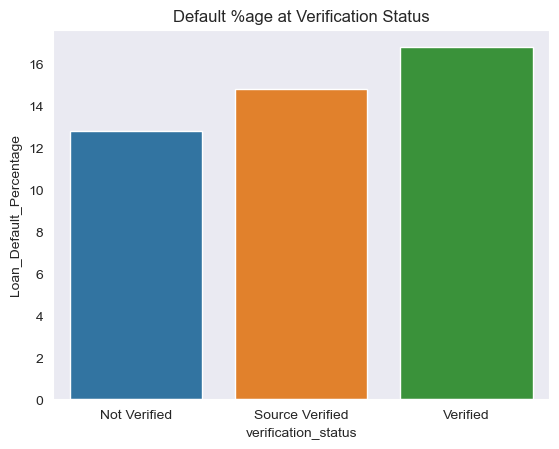

In [43]:
sns.barplot(x = 'verification_status', y = 'Loan_Default_Percentage', data = result_verification_status, order = result_verification_status.sort_values('Loan_Default_Percentage').verification_status)
plt.title('Default %age at Verification Status')
plt.show()

### Outcome - Applicant verifications does not directly relate to reasons for loan default.

In [44]:
# Computing percentage of loan default at each State level
result_addr_state = perc_cal(df,'addr_state','loan_status')
result_addr_state.head()

,addr_state,loan_status,count,total,Loan_Default_Percentage
0,AK,Charged Off,15,78,19.23
2,AL,Charged Off,54,435,12.41
4,AR,Charged Off,27,235,11.49
6,AZ,Charged Off,123,849,14.49
8,CA,Charged Off,1125,6949,16.19


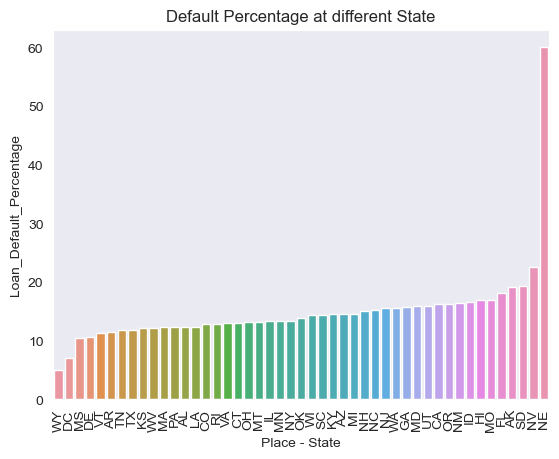

In [45]:
sns.barplot(x = 'addr_state', y = 'Loan_Default_Percentage', data = result_addr_state, order = result_addr_state.sort_values('Loan_Default_Percentage').addr_state)
plt.xticks(rotation = 90)
plt.xlabel('Place - State')
plt.title('Default Percentage at different State')
plt.show()

### Outcome - Borrower living in the state of NV and NE defaults maximum. NV is more relevant since there are very few borrower in state of NE and 60% of them have defaulted in loan payment.

In [46]:
# Creating logical grouping for interest rate
bin_int_rate = [5, 8, 11, 14, 17, 20, 23, 26]
label_int_rate = ['5 to <8', '8 to <11', '11 to <14', '14 to <17', '17 to <20', '20 to <23', '23 to <26']
df['int_rate_range'] = pd.cut(df['int_rate'], bins = bin_int_rate, right = True, labels= label_int_rate)

In [47]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,month,year,int_rate_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,Dec,11,8 to <11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,Dec,11,14 to <17
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,Dec,11,14 to <17
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,Dec,11,11 to <14
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,Dec,11,5 to <8


In [48]:
# Computing percentage of loan default at different range of interest rate
result_int_rate = perc_cal(df,'int_rate_range','loan_status')
result_int_rate

,int_rate_range,loan_status,count,total,Loan_Default_Percentage
0,5 to <8,Charged Off,440,8218,5.35
2,8 to <11,Charged Off,844,8106,10.41
4,11 to <14,Charged Off,1776,11596,15.32
6,14 to <17,Charged Off,1466,7101,20.64
8,17 to <20,Charged Off,805,2786,28.89
10,20 to <23,Charged Off,281,730,38.49
12,23 to <26,Charged Off,15,40,37.50


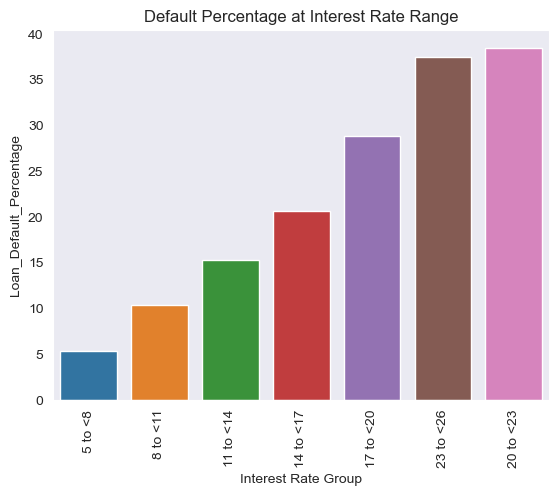

In [49]:
sns.barplot(x = 'int_rate_range', y = 'Loan_Default_Percentage', data = result_int_rate, order = result_int_rate.sort_values('Loan_Default_Percentage').int_rate_range)
plt.xticks(rotation = 90)
plt.xlabel('Interest Rate Group')
plt.title('Default Percentage at Interest Rate Range')
plt.show()

### Outcome - Higher the interest rate bucket (20 to 26) more the cases of loan default.

In [54]:
# Creating logical grouping for annual Income
bin_annual_inc = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000,160000,180000,200000,6000000]
label_annual_inc = ['0 to <20K', '20K to <40K', '40K to <60K', '60K to <80K', '80K to <1L', '1L to <1.2L', '1.2L to <1.4L','1.4L to <1.6L','1.6L to <1.8L','1.8L to <2L','2L to <60L']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins = bin_annual_inc, right = True, labels= label_annual_inc)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,month,year,int_rate_range,annual_inc_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,Jan-15,171.62,NaN,May-16,0.0,Dec,11,8 to <11,20K to <40K
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,Dec,11,14 to <17,20K to <40K
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,Jun-14,649.91,NaN,May-16,0.0,Dec,11,14 to <17,0 to <20K
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,Jan-15,357.48,NaN,Apr-16,0.0,Dec,11,11 to <14,40K to <60K
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,Jan-15,161.03,NaN,Jan-16,0.0,Dec,11,5 to <8,20K to <40K


In [55]:
# Computing percentage of loan default at different range annual Income
result_annual_income = perc_cal(df,'annual_inc_range','loan_status')
result_annual_income

,annual_inc_range,loan_status,count,total,Loan_Default_Percentage
0,0 to <20K,Charged Off,237,1180,20.08
2,20K to <40K,Charged Off,1514,8518,17.77
4,40K to <60K,Charged Off,1729,11263,15.35
6,60K to <80K,Charged Off,1024,7621,13.44
8,80K to <1L,Charged Off,531,4514,11.76
10,1L to <1.2L,Charged Off,244,2328,10.48
12,1.2L to <1.4L,Charged Off,137,1218,11.25
14,1.4L to <1.6L,Charged Off,84,710,11.83
16,1.6L to <1.8L,Charged Off,36,384,9.38
18,1.8L to <2L,Charged Off,31,271,11.44


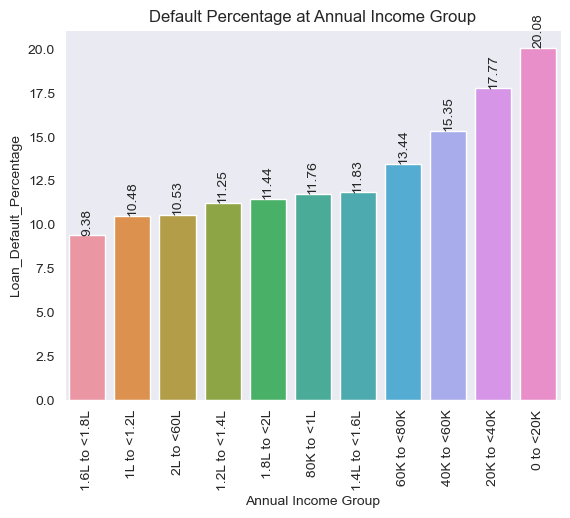

In [56]:
plots5 = sns.barplot(x = 'annual_inc_range', y = 'Loan_Default_Percentage', data = result_annual_income, order = result_annual_income.sort_values('Loan_Default_Percentage').annual_inc_range)
plots5.bar_label(plots5.containers[0],rotation = 90)
plt.xticks(rotation = 90)
plt.xlabel('Annual Income Group')
plt.title('Default Percentage at Annual Income Group')
plt.show()

### Outcome- Maximum loan default is at lower income group ( upto 80K)

In [57]:
# Computing percentage of partial principal (principal + recoveries) paid on total loan amount for default cases at different interest rate range
new_df1 = df[df['loan_status'] == 'Charged Off']
new_df1['prncp_paid_by_defaulters'] = new_df1['total_rec_prncp'] + new_df1['recoveries']
new_df2 = new_df1.groupby(['int_rate_range'])['prncp_paid_by_defaulters'].sum().reset_index(name='total_prncp_paid')
totals1 = new_df1.groupby(['int_rate_range'])['funded_amnt'].sum().reset_index(name='total_funded_amnt')
new_df2 = new_df2.merge(totals1, on='int_rate_range')
new_df2['Loan_Default_Percentage'] = round((new_df2['total_prncp_paid'] / new_df2['total_funded_amnt']) * 100, 2)
new_df2

,int_rate_range,total_prncp_paid,total_funded_amnt,Loan_Default_Percentage
0,5 to <8,1.628976e+06,3340450,48.77
1,8 to <11,3.601209e+06,7750950,46.46
2,11 to <14,7.956698e+06,19522475,40.76
3,14 to <17,6.574487e+06,17000775,38.67
4,17 to <20,4.533778e+06,12636125,35.88
5,20 to <23,1.719946e+06,5550975,30.98
6,23 to <26,9.013316e+04,334625,26.94


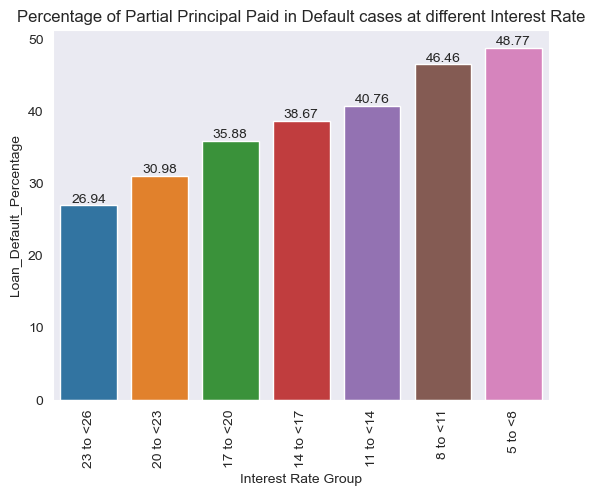

In [58]:
plots6 = sns.barplot(x = 'int_rate_range', y = 'Loan_Default_Percentage', data = new_df2, order = new_df2.sort_values('Loan_Default_Percentage').int_rate_range)
plots6.bar_label(plots6.containers[0])
plt.xticks(rotation = 90)
plt.xlabel('Interest Rate Group')
plt.title('Percentage of Partial Principal Paid in Default cases at different Interest Rate')
plt.show()

### Outcome - Percentage of principal (principal amnt + recoveries) retrived from default buyer is higher at lower lending interest rate.

In [59]:
# Calculating annual installemnt for the loan borrowers and installment amnt as percentage of annual income
df['Yearly_Installment'] = df['installment'] *12
df['install_to_annual_inc'] = round(df['Yearly_Installment'] / df['annual_inc']*100,2)

In [60]:
# Creating logical grouping for percentage of Yearly Installment on annual income
bin_instal_perc = [0, 5, 10, 15, 20, 25, 30, 35]
label_instal_perc = ['0 to <5', '5 to <10', '10 to <15', '15 to <20', '20 to <25', '25 to <30', '30 to <35']
df['install_to_annual_inc_range'] = pd.cut(df['install_to_annual_inc'], bins = bin_instal_perc, right = True, labels= label_instal_perc)

In [61]:
# Computing percentage of loan default at different level of installment vis-a-vis annual income
result_install_to_annual_inc = perc_cal(df,'install_to_annual_inc_range','loan_status')
result_install_to_annual_inc

,install_to_annual_inc_range,loan_status,count,total,Loan_Default_Percentage
0,0 to <5,Charged Off,1935,16139,11.99
2,5 to <10,Charged Off,2270,15326,14.81
4,10 to <15,Charged Off,1099,5624,19.54
6,15 to <20,Charged Off,283,1303,21.72
8,20 to <25,Charged Off,36,160,22.50
10,25 to <30,Charged Off,4,24,16.67
12,30 to <35,Charged Off,0,1,0.00


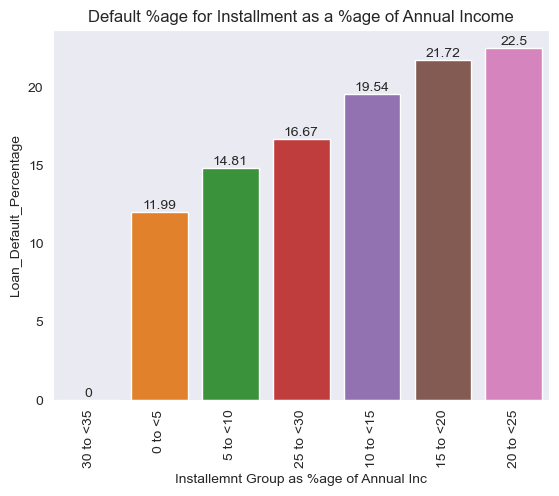

In [62]:
plots7 = sns.barplot(x = 'install_to_annual_inc_range', y = 'Loan_Default_Percentage', data = result_install_to_annual_inc, order = result_install_to_annual_inc.sort_values('Loan_Default_Percentage').install_to_annual_inc_range)
plots7.bar_label(plots7.containers[0])
plt.xticks(rotation = 90)
plt.xlabel('Installemnt Group as %age of Annual Inc')
plt.title('Default %age for Installment as a %age of Annual Income')
plt.show()

###Outcome - More loan default is seens at higher installment amnt as percentage of annual income.

In [63]:
# Creating logical grouping for funded amount
bin_funded_amnt = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
label_funded_amnt = ['0 to <5', '5 to <10', '10 to <15', '15 to <20', '20 to <25', '25 to <30', '30 to <35']
df['funded_amount_grp'] = pd.cut(df['funded_amnt'], bins = bin_funded_amnt, right = True, labels= label_funded_amnt)

In [64]:
# Computing percentage of loan default at different level of funded amount group
result_funded_amnt = perc_cal(df,'funded_amount_grp','loan_status')
result_funded_amnt

,funded_amount_grp,loan_status,count,total,Loan_Default_Percentage
0,0 to <5,Charged Off,1331,9555,13.93
2,5 to <10,Charged Off,1664,12997,12.80
4,10 to <15,Charged Off,1092,7870,13.88
6,15 to <20,Charged Off,778,4340,17.93
8,20 to <25,Charged Off,490,2547,19.24
10,25 to <30,Charged Off,123,652,18.87
12,30 to <35,Charged Off,149,616,24.19


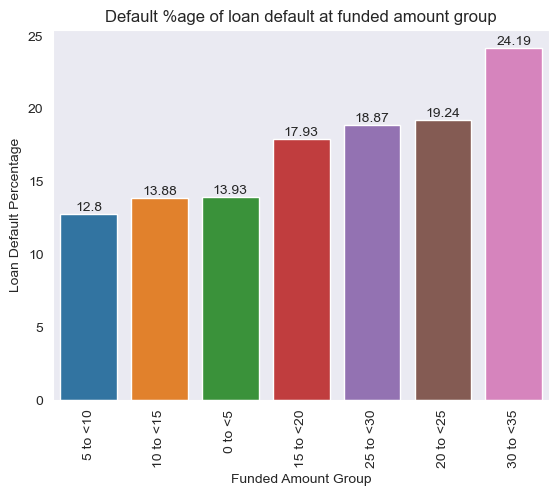

In [65]:
plots8 = sns.barplot(x = 'funded_amount_grp', y = 'Loan_Default_Percentage', data = result_funded_amnt, order = result_funded_amnt.sort_values('Loan_Default_Percentage').funded_amount_grp)
plots8.bar_label(plots8.containers[0])
plt.xticks(rotation = 90)
plt.xlabel('Funded Amount Group')
plt.ylabel('Loan Default Percentage')
plt.title('Default %age of loan default at funded amount group')
plt.show()

### Outcome - Higher loan default percentage is at higher loan sanctioned amount but the volume is low.

In [66]:
# Computing loan amount sanctioned / funded amount at different logical group of funded amount
new_df3 = df.groupby(['funded_amount_grp'])['funded_amnt'].sum().reset_index(name='total_funded_amnt1')
new_df3['total_funded_amnt'] = round(new_df3['total_funded_amnt1']/100000,0)
new_df3

,funded_amount_grp,total_funded_amnt1,total_funded_amnt
0,0 to <5,33492700,335.0
1,5 to <10,102267675,1023.0
2,10 to <15,102025500,1020.0
3,15 to <20,78149850,781.0
4,20 to <25,60165825,602.0
5,25 to <30,18656300,187.0
6,30 to <35,21258775,213.0


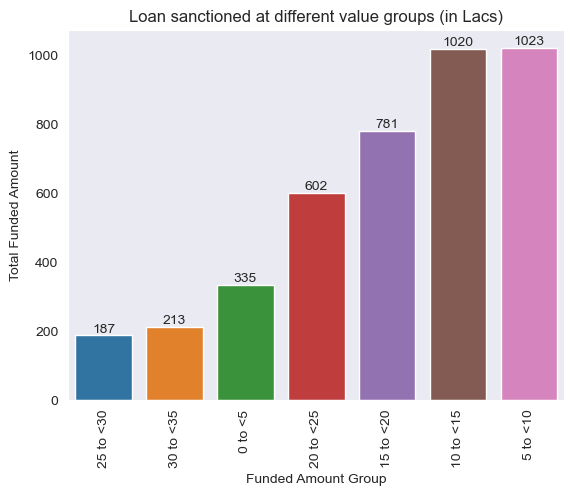

In [67]:
plots9 = sns.barplot(x = 'funded_amount_grp', y = 'total_funded_amnt', data = new_df3, order = new_df3.sort_values('total_funded_amnt').funded_amount_grp)
plots9.bar_label(plots9.containers[0])
plt.xticks(rotation = 90)
plt.xlabel('Funded Amount Group')
plt.ylabel('Total Funded Amount')
plt.title('Loan sanctioned at different value groups (in Lacs)')
plt.show()

### Outcome - Maximum volume of funded amount sits at lower values of loan sanctions 